# 9. Визуализация на основе библиотек ***matplotlib*** и ***seaborn***

### 9.1. Базовые возможности библиотеки ***matplotlib*** без надстройки ***seaborn***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')
%matplotlib inline

In [2]:
# СОЗДАЕМ НАБОР ДАННЫХ ИЗ ДВУХ СПИСКОВ (x, y)

x = [i for i in range(10)]
y = [i**2 for i in x]
z = pd.DataFrame({'x':x, 'y':y})

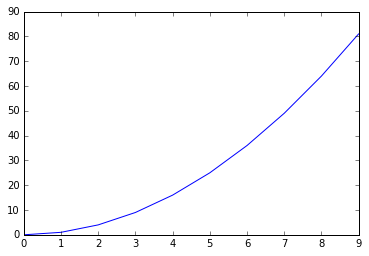

In [3]:
# И СТРОИМ ПРОСТЕЙШИЙ ГРАФИК

# sns.set()
plt.plot(x,y);

In [4]:
# ИЗМЕНЯЕМ ПАРАМЕТРЫ ПОЛЯ ГРАФИКА

plt.rcParams['figure.figsize'] = 12, 4

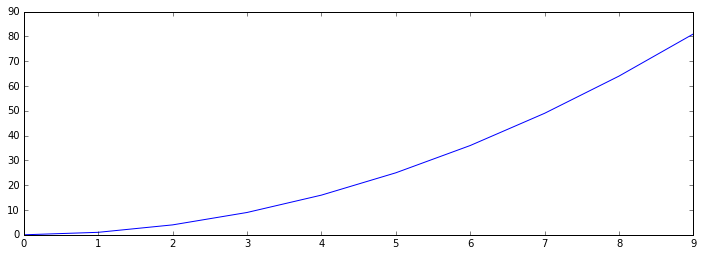

In [5]:
# И СТРОИМ ТОТ ЖЕ ГРАФИК

plt.plot(x,y);

In [2]:
# ПОДГРУЖАЕМ НАБОРЫ ДАННЫХ: ПО КВАРТИРАМ И ПО ДИНАМИКЕ ЦЕН НА АКЦИИ

flats = pd.read_csv('flats_review.csv', sep=';', decimal=',', index_col=0)
stocks = pd.read_csv('stocks.csv', parse_dates=True, index_col='Date')
print(flats.head(3), '\n')
print(stocks.head(3))

   price     s  floor  rooms  walls  district
n                                            
1  10000  18.5      1      1      1         1
2  11000  57.1      1      3      0         1
3   9000  19.0      3      1      1         1 

                  AAPL       IBM      CSCO      MSFT
Date                                                
2000-01-03  111.937502  116.0000  108.0625  116.5625
2000-01-04  102.500003  112.0625  102.0000  112.6250
2000-01-05  103.999997  116.0000  101.6875  113.8125


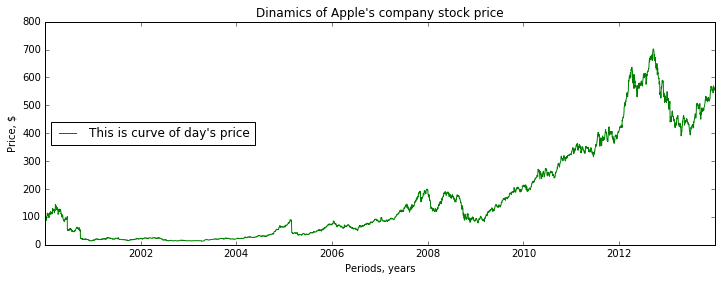

In [7]:
# СТРОИМ ГРАФИК ЦЕН НА АКЦИИ КОМПАНИИ Apple ЗА ВЕСЬ ИМЕЮЩИЙСЯ ПЕРИОД НАБЛЮДЕНИЙ
# РАЗУМЕЕТСЯ, КАЖДЫЙ ГОТОВЫЙ ГРАФИК ДОЛЖЕН ИМЕТЬ НЕОБХОДИМЫЕ АТРИБУТЫ - ЭКСПЛИКАЦИЮ

apple = stocks['AAPL']
plt.plot(apple, color='green')
# ЗАГОЛОВОК
plt.title('Dinamics of Apple\'s company stock price')
# ПОДПИСИ ПО ОСЯМ
plt.xlabel('Periods, years')
plt.ylabel('Price, $')
# НЕОБХОДИМЫЕ ПОЯСНЕНИЯ В ПОЛЕ ГРАФИКА
plt.legend(['This is curve of day\'s price'], loc='center left');

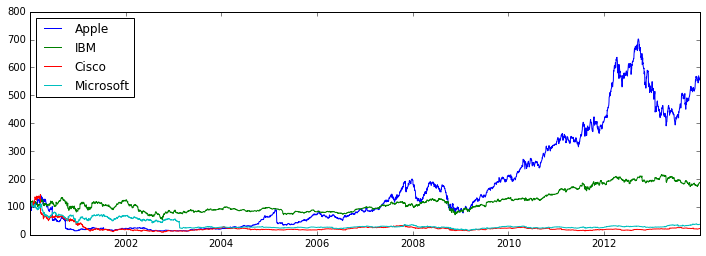

In [8]:
# СТРОИМ ПОДОБНЫЕ ГРАФИКИ ПО ВСЕМ КОМПАНИЯМ - НА ОДНОМ ГРАФИЧЕСКОМ ПОЛЕ

plt.plot(stocks['AAPL'])
plt.plot(stocks['IBM'])
plt.plot(stocks['CSCO'])
plt.plot(stocks['MSFT'])
plt.legend(['Apple', 'IBM', 'Cisco', 'Microsoft'], loc='upper left');

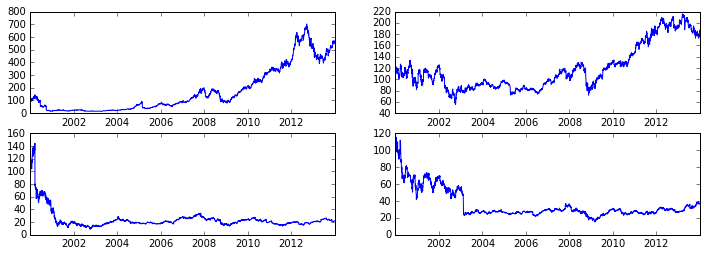

In [9]:
# ДЕЛАЕМ ТО ЖЕ САМОЕ, НО ТЕПЕРЬ ГРАФИКИ ПОСТРОЕНЫ ПО ОТДЕЛЬНОСТИ КАЖДЫЙ В СВОЕМ ГРАФИЧЕСКОМ ПОЛЕ
plt.subplot(2,2,1)
plt.plot(stocks['AAPL'])
plt.subplot(2,2,2)
plt.plot(stocks['IBM'])
plt.subplot(2,2,3)
plt.plot(stocks['CSCO'])
plt.subplot(2,2,4)
plt.plot(stocks['MSFT']);

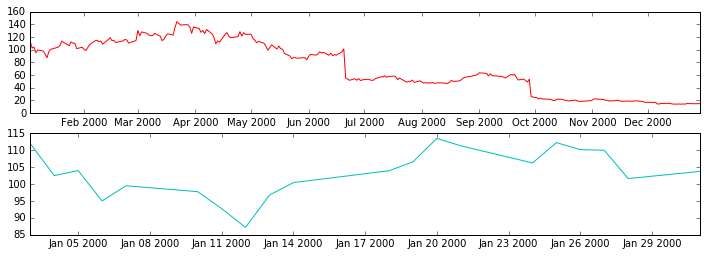

In [10]:
# БЕРЕМ ЧАСТЬ ИСХОДНОГО НАБОРА ДАННЫХ (ЦЕНЫ НА АКЦИИ Apple ЗА 2000 Г.) И СТРОИМ ГРАФИК
plt.subplot(2,1,1)
apple_2000 = apple.loc['2000-01-03':'2000-12-31']
plt.plot(apple_2000, c='red')

# ТЕПЕРЬ БЕРЕМ ДАННЫЕ ЗА ЕЩЕ БОЛЕЕ КОРОТКИЙ ПЕРИОД ВРЕМЕНИ - ЯНВАРЬ 2000 Г. - И ОПЯТЬ СТРОИМ ГРАФИК
plt.subplot(2,1,2)
apple_january_2000 = apple.loc['2000-01-01':'2000-01-31']
plt.plot(apple_january_2000, c='c');

In [11]:
# ДЛЯ ДЕМОНСТРАЦИИ ПОСТРОЕНИЯ СТОЛБИКОВЫХ И ЛЕНТОЧНЫХ ДИАГРАММ СОЗДАДИМ НАБОР ДАННЫХ
# ИЗ СЛУЧАЙНОЙ НОРМАЛЬНО РАСПРЕДЕЛЕННОЙ ВЫБОРКИ (РАЗМЕРНОСТЬ 10 X 4)

df_10 = pd.DataFrame(np.random.rand(10, 4), columns=['A', 'B', 'C', 'D'])
df_10.head(2)

,A,B,C,D
0,0.282654,0.196514,0.171559,0.029124
1,0.679968,0.989345,0.893193,0.984832


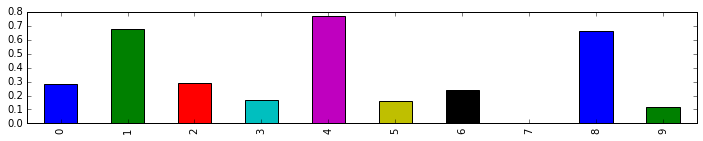

In [12]:
# СТРОИМ СТОЛБИКОВУЮ ДИАГРАММУ ПО ЗНАЧЕНИЯМ ПЕРЕМЕННОЙ 'A' - ЭТО НЕ ГИСТОГРАММА РАСПРЕДЕЛЕНИЯ!!!

df_10['A'].plot(kind='bar', figsize=(12,2));

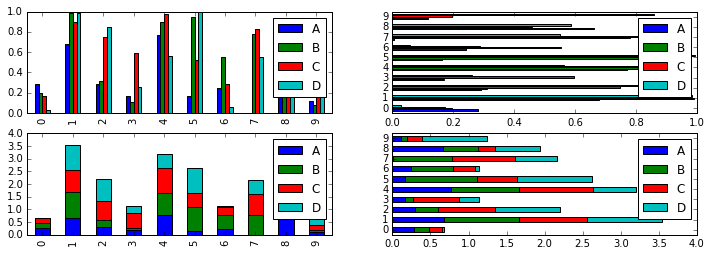

In [13]:
# СТРОИМ РАЗЛИЧНЫЕ ВАРИАНТЫ СТОЛБИКОВЫХ ДИАГРАММ (ВЕРТИКАЛЬНЫЕ И ГОРИЗОНТАЛЬНЫЕ, В СТЕКЕ И БЕЗ СТЕКА)

ax1 = plt.subplot2grid(shape=(2,2), loc=(0,0))
df_10.plot(kind='bar', ax=ax1)
ax2 = plt.subplot2grid(shape=(2,2), loc=(0,1))
df_10.plot(kind='barh', ax=ax2)
ax3 = plt.subplot2grid(shape=(2,2), loc=(1,0))
df_10.plot(kind='bar', stacked=True, ax=ax3)
ax4 = plt.subplot2grid(shape=(2,2), loc=(1,1))
df_10.plot(kind='barh', stacked=True, ax=ax4);

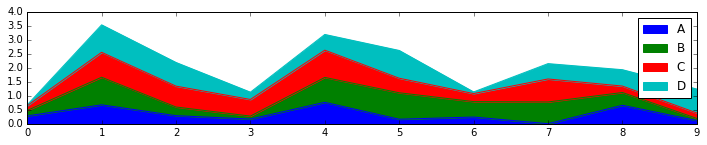

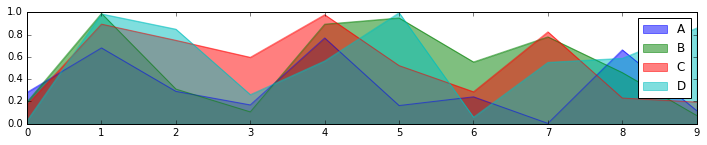

In [14]:
# 'ПЛОЩАДНЫЕ' ДИАГРАММЫ - В СТЕКЕ И БЕЗ СТЕКА (ВЫВОДЯТСЯ С ОПРЕДЕЛЕННЫМ УРОВНЕМ ПРОЗРАЧНОСТИ)

df_10.plot(kind='area', figsize=(12,2))
df_10.plot(kind='area', stacked=False, figsize=(12,2));

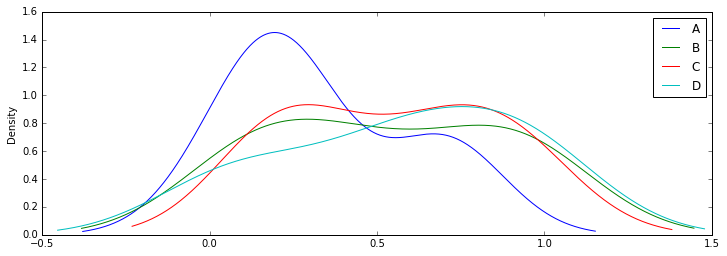

In [15]:
# ГРАФИК ЯДЕРНОГО СГЛАЖИВАНИЯ ФУНКЦИИ ПЛОТНОСТИ (KERNEL DENSITY ESTIMATION, KDE)
# (ОДИН ИЗ НЕПАРАМЕТРИЧЕСКИХ СПОСОБОВ ОЦЕНКИ ПЛОТНОСТИ ВЕРОЯТНОСТИ СЛУЧАЙНОЙ ВЕЛИЧИНЫ)

df_10.plot(kind='kde');

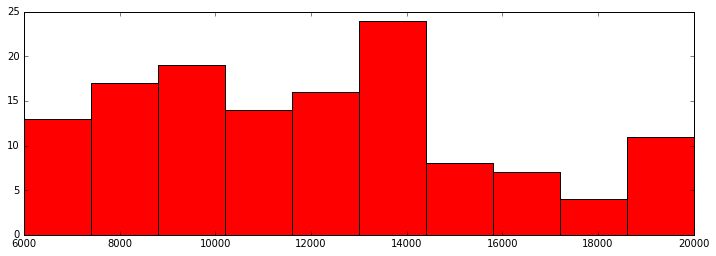

In [16]:
# СТРОИМ ГИСТОГРАММУ РАСПРЕДЕЛЕНИЯ КВАРТИР ПО ПРИЗНАКУ ЦЕНЫ - ПОЛУЧИЛИ ДЕСЯТЬ СТОЛБЦОВ

plt.hist(flats['price'], color='r');

In [17]:
# floor.plot(kind='hist');

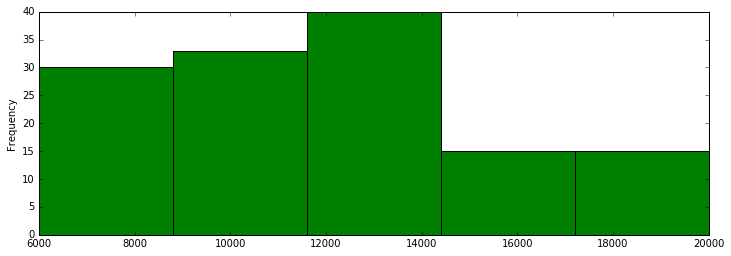

In [18]:
# ТЕПЕРЬ ЗАДАЕМ ЧИСЛО СТОЛБЦОВ - ЗНАЧЕНИЕ ГРУПП, НА КОТОРЫЕ ДОЛЖНА БЫТЬ РАЗБИТА СОВОКУПНОСТЬ

flats['price'].plot(kind='hist', color='green', bins=5);

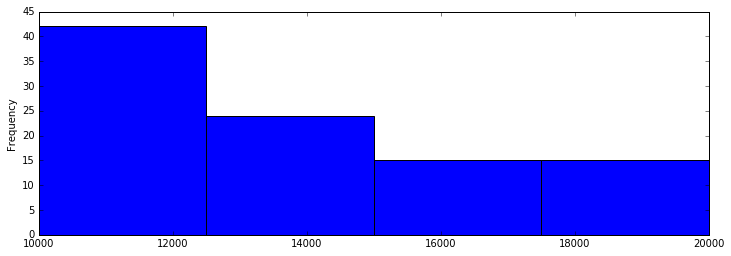

In [19]:
# НАКОНЕЦ, ЗАДАЕМ ГРАНИЦЫ ИНТЕРВАЛОВ ГРУПП, НА КОТОРЫЕ РАЗБИВАЕТСЯ СОВОКУПНОСТЬ

flats['price'].plot(kind='hist', bins=[10000, 12500, 15000, 17500, 20000]);

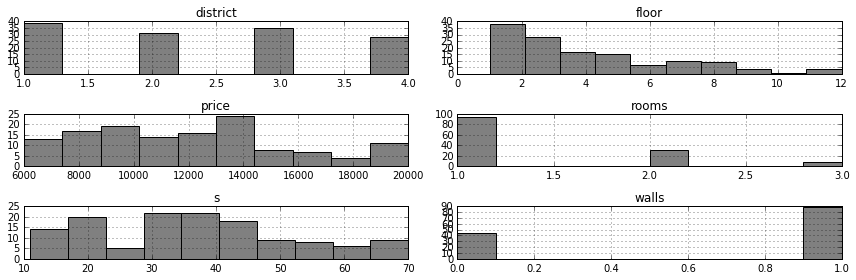

In [20]:
# ВЫВЕДЕМ РАСПРЕДЕЛЕНИЕ ЗНАЧЕНИЙ ВСЕХ ПРИЗНАКОВ, ХАРАКТЕРИЗУЮЩИХ СОВОКУПНОСТЬ КВАРТИР

flats.hist(color='gray')
plt.tight_layout();

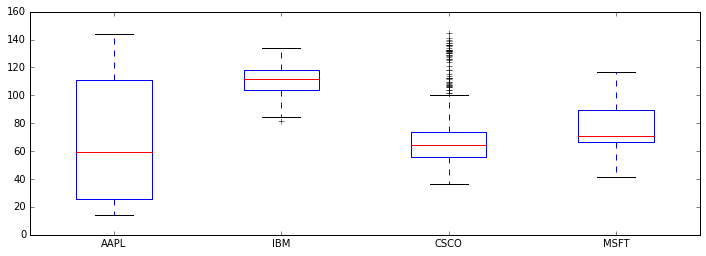

In [21]:
# ГРАФИКИ 'ЯЩИКИ С УСАМИ' ('boxplots') ПОСТРОЕНЫ ПО ЦЕНАМ НА АКЦИИ КОМПАНИЙ ЗА 2000 Г.

stocks_2000 = stocks.loc['2000-01-01':'2000-12-31']
stocks_2000.plot(kind='box');

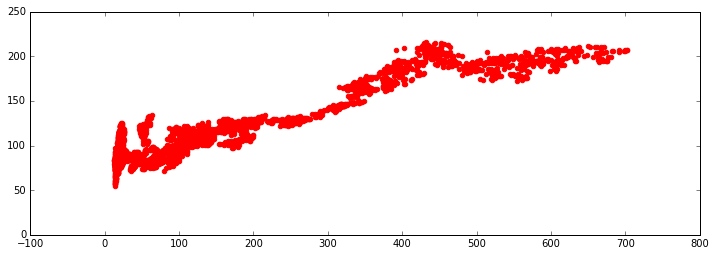

In [22]:
# СТРОИМ ДИАГРАММУ РАССЕЯНИЯ - ОТРАЖЕНИЕ КОРРЕЛЯЦИИ МЕЖДУ ЦЕНАМИ НА КАЦИИ Apple и  IBM

plt.scatter(stocks['AAPL'], stocks['IBM'], color='red');

In [23]:
# stocks[['CSCO', 'MSFT']].plot(kind='scatter', x='CSCO', y='MSFT');

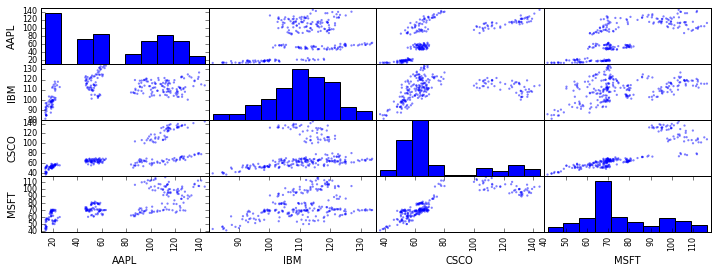

In [24]:
# ВОЗМОЖНО ПОСТРОИТЬ ЦЕЛУЮ МАТРИЦУ ТАКИХ ДИАГРАММ РАССЕЯНИЯ, ГДЕ ПО ГЛАВНОЙ ДИАГОНАЛИ
# ПРИВОДЯТСЯ ГИСТОГРАММЫ РАСПРЕДЕЛЕНИЯ

from pandas.plotting import scatter_matrix

stocks_2000 = stocks.loc['2000-01-01':'2000-12-31']
scatter_matrix(stocks_2000);

          AAPL       IBM      CSCO      MSFT
AAPL  1.000000  0.940635 -0.096569 -0.259087
IBM   0.940635  1.000000 -0.013789 -0.095151
CSCO -0.096569 -0.013789  1.000000  0.647687
MSFT -0.259087 -0.095151  0.647687  1.000000


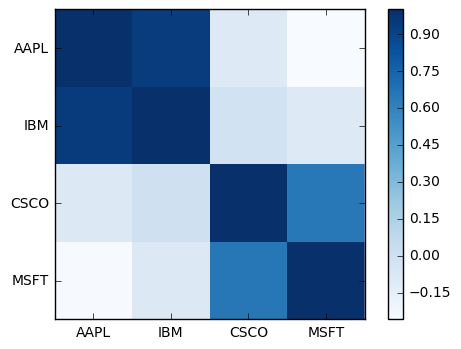

In [5]:
# ВЫВОДИМ МАТРИЦУ КОЭФФИЦИЕНТОВ ПАРНОЙ КОРРЕЛЯЦИИ И ВЫРАЖАЕМ ЕЕ ЗНАЧЕНИЯ В ВИДЕ ГРАФИКА
# ПОД НАЗВАНИЕМ 'ТЕПЛОВАЯ КАРТА', ГДЕ ЯРКОСТЬ ЦВЕТА СООТВЕТСТВУЕТ ВЕЛИЧИНЕ КОЭФФИЦИЕНТА

stocks_corr_matrix = stocks.corr()
print(stocks_corr_matrix)
plt.imshow(stocks_corr_matrix, cmap='Blues', interpolation='none')
plt.xticks(range(len(stocks_corr_matrix.columns)), stocks_corr_matrix.columns)
plt.yticks(range(len(stocks_corr_matrix.columns)), stocks_corr_matrix.columns)
plt.colorbar();

### 9.2. Библиотека ***seaborn*** как надстройка над ***matplotlib***

bmh


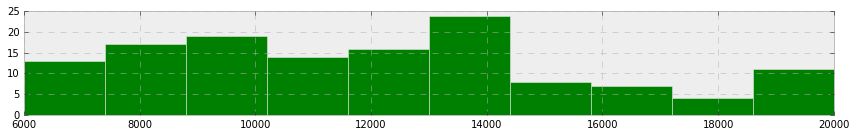

classic


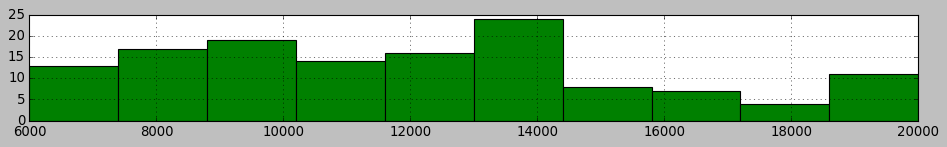

dark_background


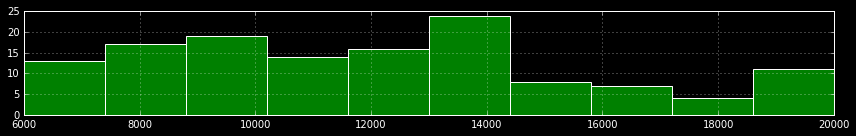

fast


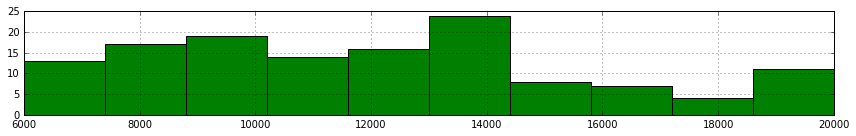

fivethirtyeight


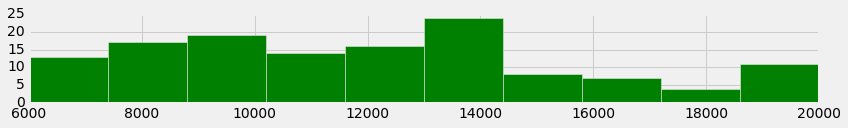

In [26]:
# ПИШЕМ ФУНКЦИЮ ДЛЯ ВЫВОДА НА ЭКРАН ПРИМЕРОВ РАЗЛИЧНЫХ СТИЛЕЙ ОФОРМЛЕНИЯ ГРАФИКОВ

def paint(x):
    x.hist(color='green', figsize=(12,2))
    plt.tight_layout();
    
def n_paint(x):
    for i in range(len(plt.style.available[:5])):
        with plt.style.context(str(plt.style.available[i])):
            print(plt.style.available[i])
            paint(x)
            plt.show()

n_paint(flats['price'])  

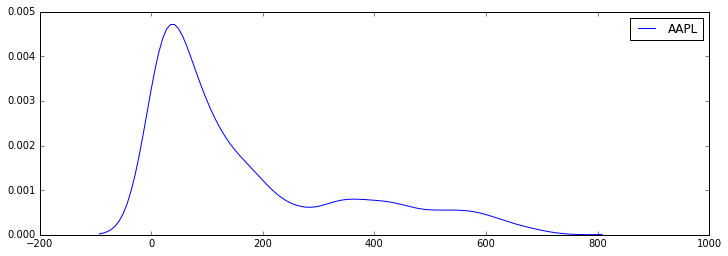

In [27]:
# ГРАФИК ЯДЕРНОЙ ОЦЕНКИ ФУНКЦИИ ПЛОТНОСТИ ЦЕН НА АКЦИИ Apple
sns.kdeplot(apple);

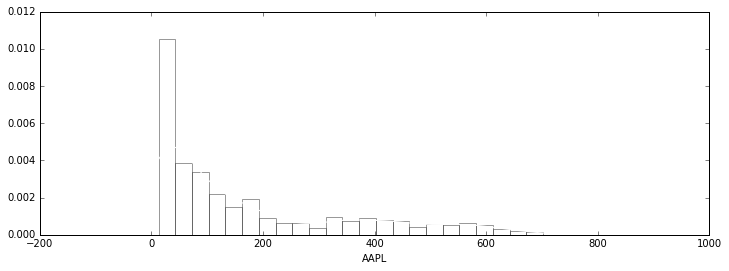

In [28]:
# ГРАФИК, СОВМЕЩАЮЩИЙ В СЕБЕ ГИСТОГРАММУ РАСПРЕДЕЛЕНИЯ И ЯДЕРНУЮ ОЦЕНКУ ФУНКЦИИ ПЛОТНОСТИ

sns.distplot(stocks['AAPL'], color='w');

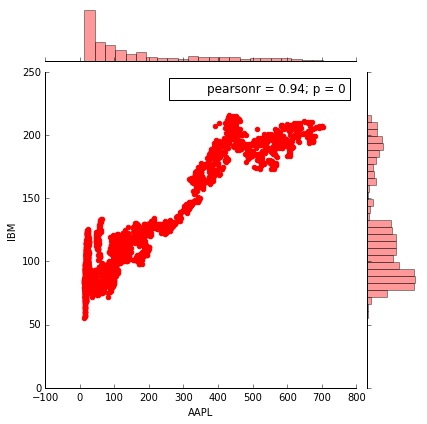

In [29]:
# ДИАГРАММА РАССЕЯНИЯ С ГИСТОГРАММАМИ РАСПРЕДЕЛЕНИЯ (ВАРИАНТ 1)

sns.jointplot(stocks['AAPL'], stocks['IBM'], color='r');

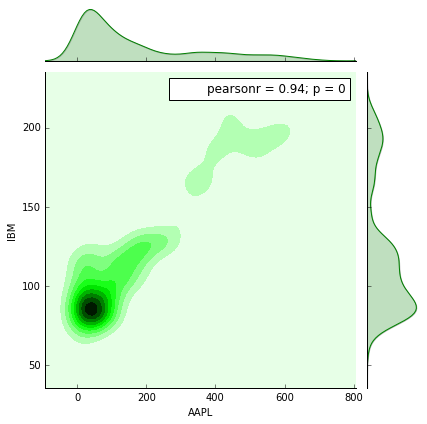

In [30]:
# ДИАГРАММА РАССЕЯНИЯ С ГИСТОГРАММАМИ РАСПРЕДЕЛЕНИЯ (ВАРИАНТ 2)

sns.jointplot(stocks['AAPL'], stocks['IBM'], color='g', kind='kde');

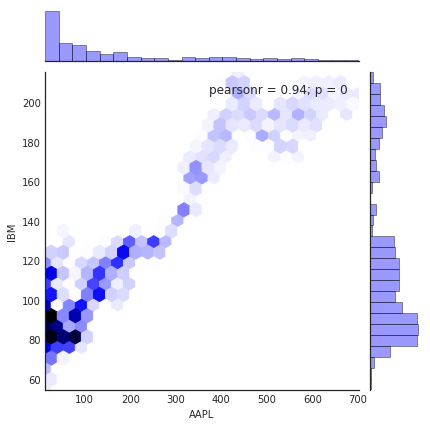

In [31]:
# ДИАГРАММА РАССЕЯНИЯ С ГИСТОГРАММАМИ РАСПРЕДЕЛЕНИЯ (ВАРИАНТ 3)

with sns.axes_style('white'):
    sns.jointplot(stocks['AAPL'], stocks['IBM'], kind='hex')

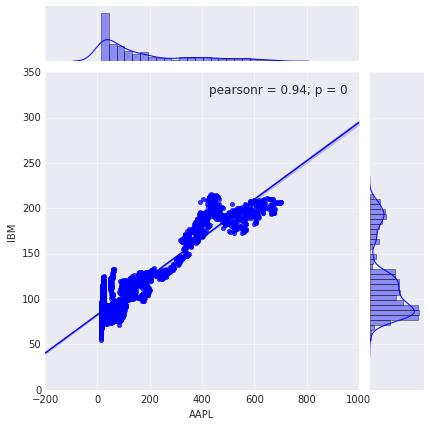

In [32]:
# ДИАГРАММА РАССЕЯНИЯ С ГИСТОГРАММАМИ РАСПРЕДЕЛЕНИЯ (ВАРИАНТ 4)

with sns.axes_style('darkgrid'):
    sns.jointplot(stocks['AAPL'], stocks['IBM'], kind='reg')

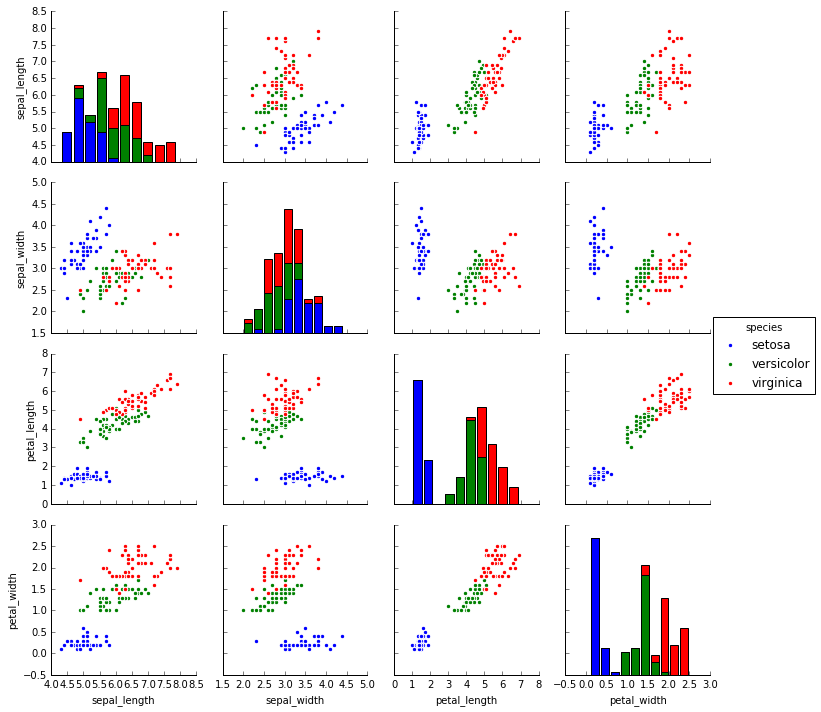

In [33]:
# ЗАГРУЖАЕМ ИЗВЕСТНЫЙ НАБОР ДАННЫХ IRIS И СТРОИМ ДИАГРАММЫ РАССЕЯНИЯ И ГИСТОГРАММЫ РАСПРЕДЕЛЕНИЯ

iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species');

In [34]:
# ЗАГРУЖАЕМ ЕЩЕ ОДИН НАБОР ДАННЫХ, СОДЕРЖАЩИЙ ИНФОРМАЦИЮ О ЧАЕВЫХ ОФИЦИАНТАМ

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


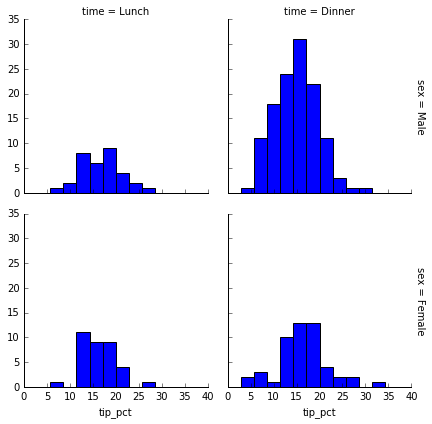

In [35]:
# РАСПРЕДЕЛЕНИЕ ОТНОСИТЕЛЬНОГО ПОКАЗАТЕЛЯ ЧАЕВЫХ ПО РАЗЛИЧНЫМ ГРУППАМ НАБЛЮДЕНИЙ

tips['tip_pct'] = (tips['tip'] / tips['total_bill']) * 100
grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0,40,15));

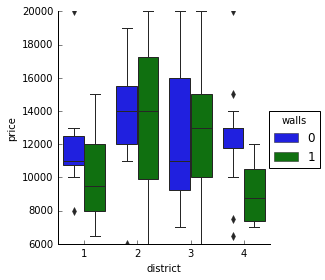

In [36]:
# НАКОНЕЦ, ГРАФИК ДИФФЕРЕНЦИАЦИИ ЦЕН НА КВАРТИРЫ В ЗАВИСИМОСТИ
# МАТЕРИАЛА СТЕН И РАЙОНА РАСПОЛОЖЕНИЯ

sns.factorplot('district', 'price', 'walls', flats, kind='box');

### Переходим к ***scikit-learn***